# Case 1 -

top 5 players with most goals in 2019/20 season

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'C:/Users/91958/Desktop/nyadata/PL_Player_Stats.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
case1 = df.copy()

In [5]:
case1

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59
...,...,...,...,...,...,...,...,...,...,...
535,536,Dennis Cirkin,Tottenham Hotspur,0,0,0,0,0,0,0
536,537,Darnell Johnson,Leicester City,0,0,0,0,0,0,0
537,538,Timothy Fosu-Mensah,Manchester United,3,2,136,0,0,1,0
538,539,Conor Coventry,West Ham United,0,0,0,0,0,0,0


### Changing column names

   so that data is more readable

In [7]:
case1.columns

Index(['Rank', 'PLAYER', 'TEAM', 'GP', 'GS', 'MIN', 'G', 'ASST', 'SHOTS',
       'SOG'],
      dtype='object')

In [9]:
case1.columns = ['Rank','PLAYER','TEAM','GamesPlayed','GamesStarted','MIN','Goals','Assists','TotalShots','SOT']
case1.columns

Index(['Rank', 'PLAYER', 'TEAM', 'GamesPlayed', 'GamesStarted', 'MIN', 'Goals',
       'Assists', 'TotalShots', 'SOT'],
      dtype='object')

In [10]:
case1.head()

,Rank,PLAYER,TEAM,GamesPlayed,GamesStarted,MIN,Goals,Assists,TotalShots,SOT
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59


In [43]:

case1['PLAYER'].replace("Pierre-Emerick Aubameyang", "Pierre Aubameyang", inplace = True)
case1['PLAYER'].replace("Raheem Shaquille Sterling", "Raheem Sterling", inplace = True)
case1['PLAYER'].replace("Mohamed Salah Ghaly", "Moh Salah", inplace = True)

In [44]:
# Filtering na if any

case1.dropna(inplace = True, subset = ['PLAYER'])
case1.reset_index(inplace = True, drop = True)
case1

,Rank,PLAYER,TEAM,GamesPlayed,GamesStarted,MIN,Goals,Assists,TotalShots,SOT
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38
2,3,Pierre Aubameyang,Arsenal,36,35,3138,22,3,70,42
3,4,Raheem Sterling,Manchester City,33,30,2660,20,1,68,38
4,5,Moh Salah,Liverpool,34,33,2884,19,10,95,59
...,...,...,...,...,...,...,...,...,...,...
535,536,Dennis Cirkin,Tottenham Hotspur,0,0,0,0,0,0,0
536,537,Darnell Johnson,Leicester City,0,0,0,0,0,0,0
537,538,Timothy Fosu-Mensah,Manchester United,3,2,136,0,0,1,0
538,539,Conor Coventry,West Ham United,0,0,0,0,0,0,0


In [45]:
def GperMIN(player,G):
    di = {}   ## key as player name value as goals scored as value 
    
    n = len(player)
    for index in range(n):
        i = player[index]
        g = G[index]
        di[i] =  g 
        
    return di    
        

In [46]:
dictionary = GperMIN(case1["PLAYER"],case1["Goals"])
dictionary

{'Jamie Vardy': 23,
 'Danny Ings': 22,
 'Pierre Aubameyang': 22,
 'Raheem Sterling': 20,
 'Moh Salah': 19,
 'Sadio Mané': 18,
 'Harry Kane': 18,
 'Raúl Alonso Jiménez Rodríguez': 17,
 'Marcus Rashford': 17,
 'Anthony Martial': 17,
 'Sergio Leonel Agüero del Castillo': 16,
 'Tammy Bakumo-Abraham': 15,
 'Gabriel Fernando de Jesus': 14,
 'Chris Wood': 14,
 'Kevin De Bruyne': 13,
 'Dominic Calvert-Lewin': 13,
 'Richarlison de Andrade': 13,
 'Teemu Pukki': 11,
 'Riyad Mahrez': 11,
 'Heung-Min Son': 11,
 'Michail Antonio': 10,
 'Neal Maupay': 10,
 'Alexandre Lacazette': 10,
 'Mason Greenwood': 10,
 'Troy Deeney': 10,
 'Roberto Firmino Barbosa de Oliveira': 9,
 'Jordan Ayew': 9,
 'Christian Pulisic': 9,
 'Willian Borges Da Silva': 9,
 'Callum Wilson': 8,
 'Jack Grealish': 8,
 'Ayoze Pérez': 8,
 'Olivier Giroud': 8,
 'Jay Rodriguez': 8,
 'Bamidele Alli': 8,
 'Bruno Miguel Borges Fernandes': 8,
 'Sébastien Haller': 7,
 'Harry Wilson': 7,
 'Diogo José Teixeira da Silva': 7,
 'Mason Mount': 7,
 '

In [47]:
top5_goal_scorer = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
top5_goal_scorer = top5_goal_scorer.sort_values(by = [0], ascending = False)
top5_goal_scorer

,0
Jamie Vardy,23
Danny Ings,22
Pierre Aubameyang,22
Raheem Sterling,20
Moh Salah,19
...,...
Martin Dúbravka,0
Karl Darlow,0
Rui Pedro dos Santos Patrício,0
Danny Ward,0


In [48]:
x= []
y = []

for i in range(5):
    x.append(top5_goal_scorer.index[i])
    y.append(top5_goal_scorer.values[i][0])
    
y    

[23, 22, 22, 20, 19]

In [49]:
print("List Of Top 5 Goalscorers in Premier League 2019/20 Season :")
i = 0
for ele in x:
    print(i+1,end='')
    print(": ",end = '')
    print(ele)
    
    i += 1

List Of Top 5 Goalscorers in Premier League 2019/20 Season :
1: Jamie Vardy
2: Danny Ings
3: Pierre Aubameyang
4: Raheem Sterling
5: Moh Salah


## Plotting bar graph

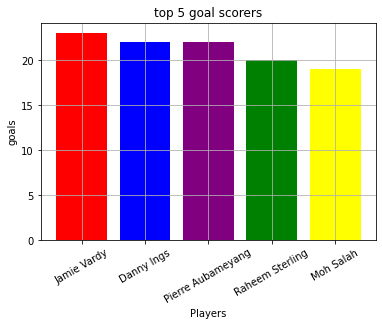

In [50]:
plt.bar(x,y,color = ['red','blue','purple','green','yellow'])
plt.xlabel("Players")
plt.grid()
plt.xticks(rotation = 30)
plt.ylabel("goals")
plt.title("top 5 goal scorers")
plt.show()

In [51]:
li = list(zip(x,y))
freq = pd.DataFrame(li, columns = ["players", "Goals Scored"])
freq

,players,Goals Scored
0,Jamie Vardy,23
1,Danny Ings,22
2,Pierre Aubameyang,22
3,Raheem Sterling,20
4,Moh Salah,19
